# Lung Cancer

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

## Load the dataset

In [126]:
data = pd.read_csv("survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [127]:
data.shape

(309, 16)

In [128]:
data.duplicated().sum()

33

In [129]:
df = data.drop_duplicates()

In [130]:
df.shape

(276, 16)

In [131]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [133]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [134]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

No null values present

In [135]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

## EDA

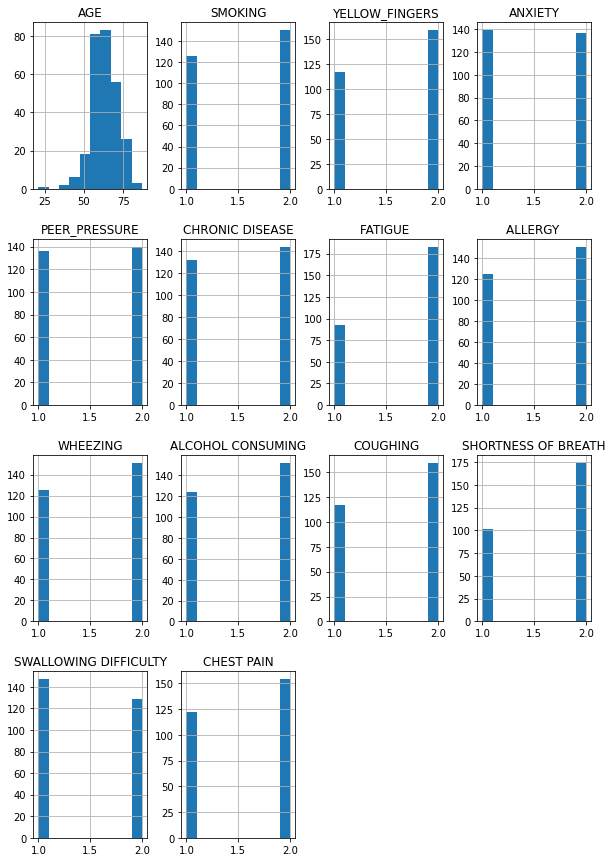

In [136]:
plot = df.hist(figsize=(10,15))

In [137]:
df1 = df.replace({"M":0, "F":1, "NO":0, "YES":1})
df1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


## Handling outliers

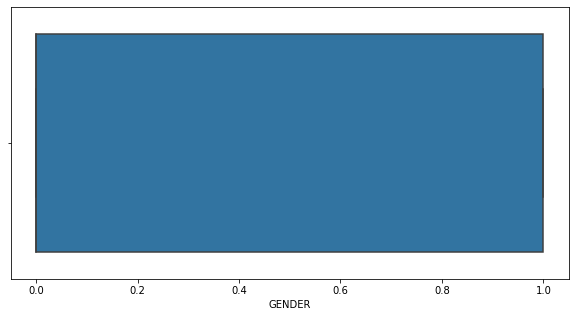

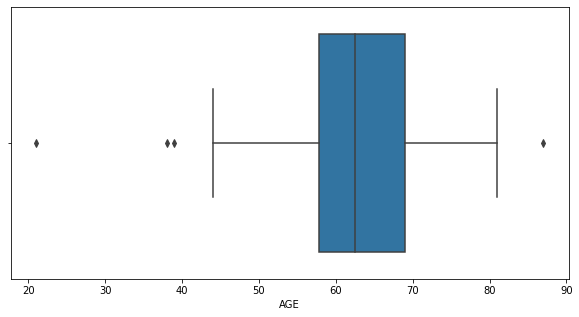

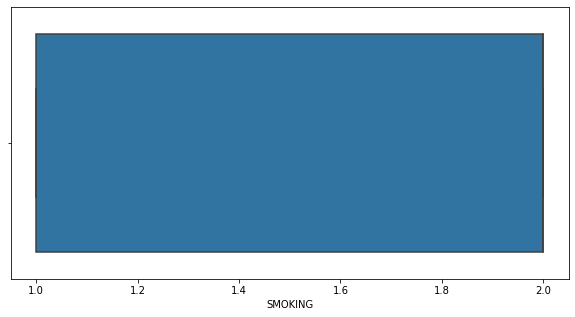

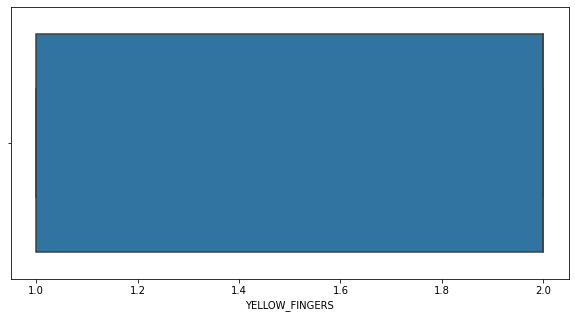

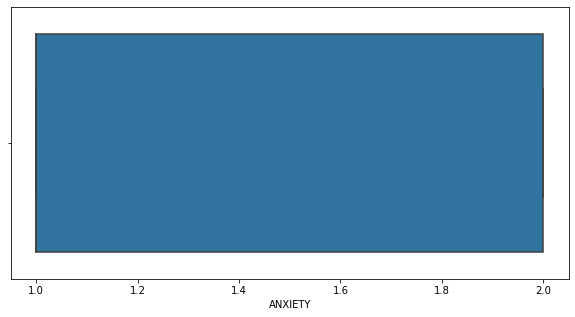

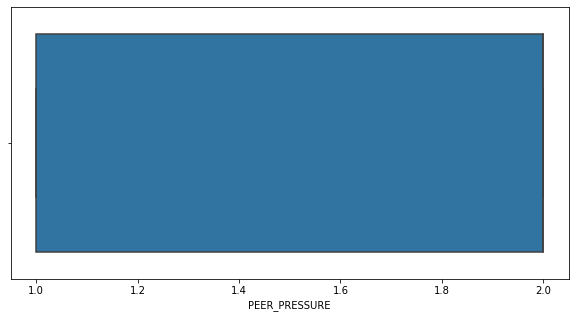

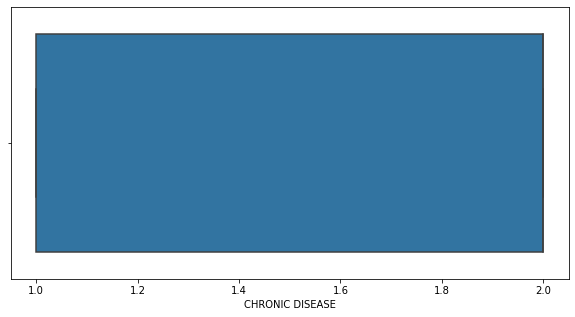

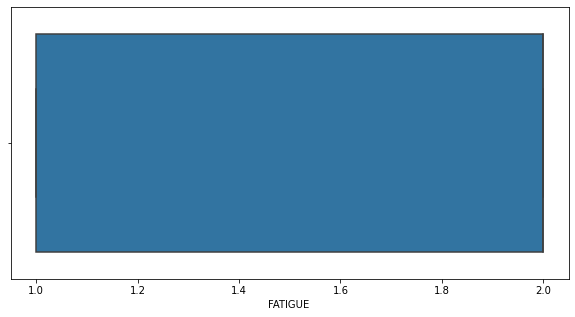

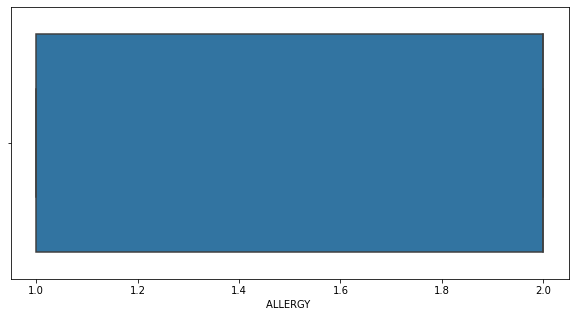

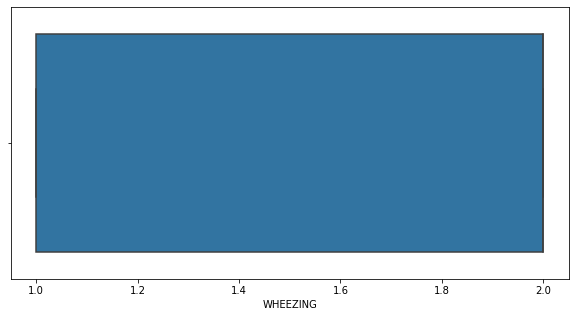

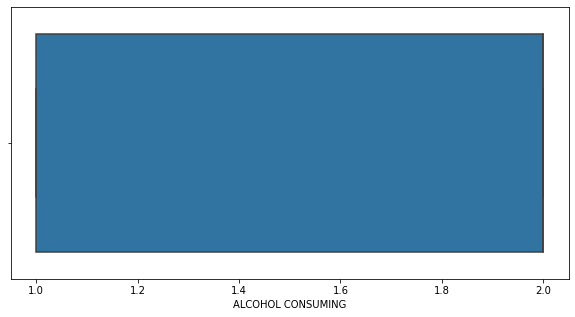

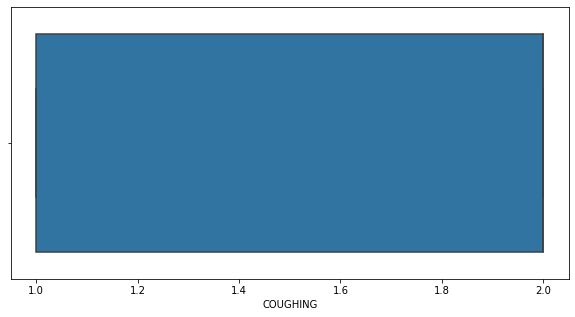

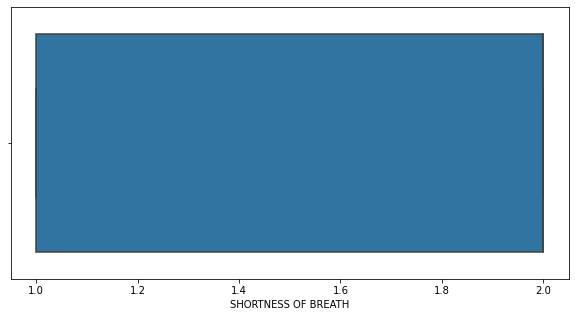

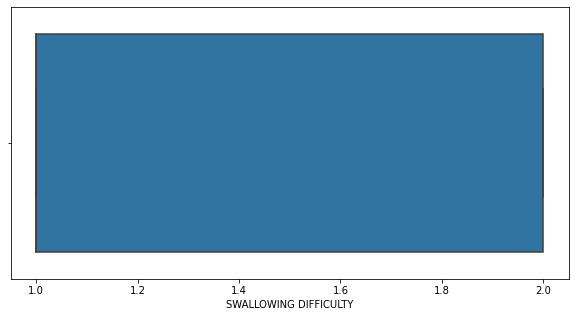

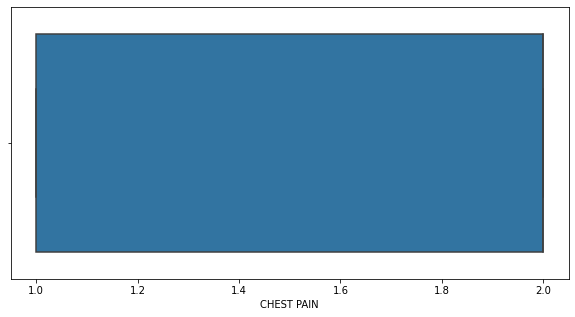

In [138]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df1)

In [139]:
df1_age = df1["AGE"]
q1=df1["AGE"].quantile(0.25)
q3=df1["AGE"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
df1["AGE"]=np.where(df1["AGE"]<=lower_limit,lower_limit,df1["AGE"])
df1["AGE"]=np.where(df1["AGE"]>=upper_limit,upper_limit,df1["AGE"])
df1["AGE"]

0      69.0
1      74.0
2      59.0
3      63.0
4      63.0
       ... 
279    59.0
280    59.0
281    55.0
282    46.0
283    60.0
Name: AGE, Length: 276, dtype: float64

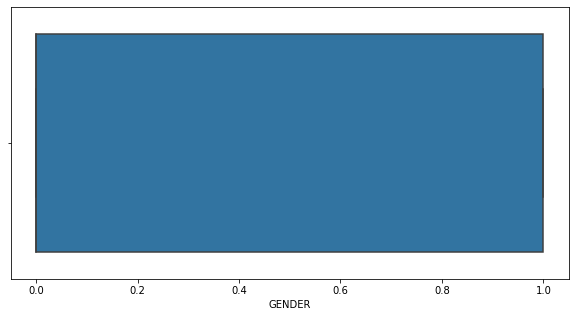

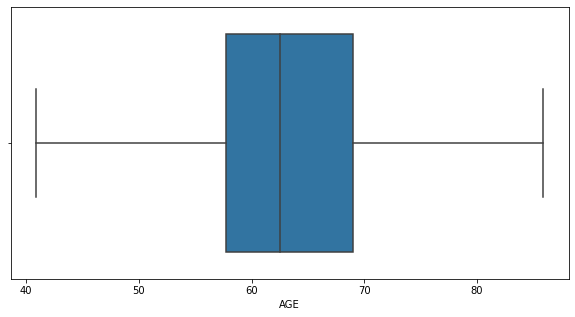

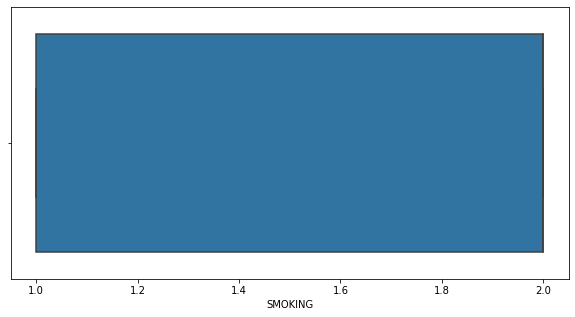

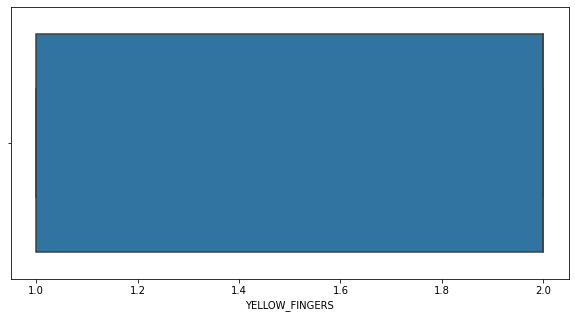

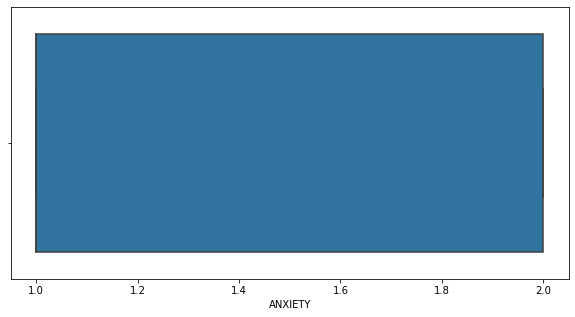

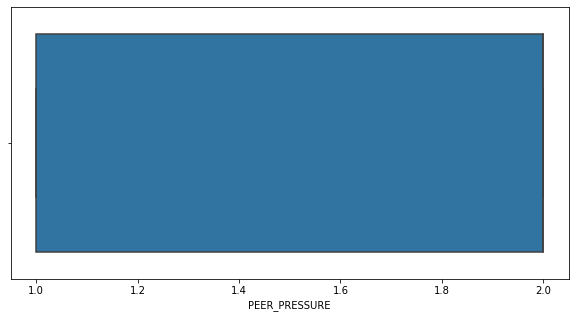

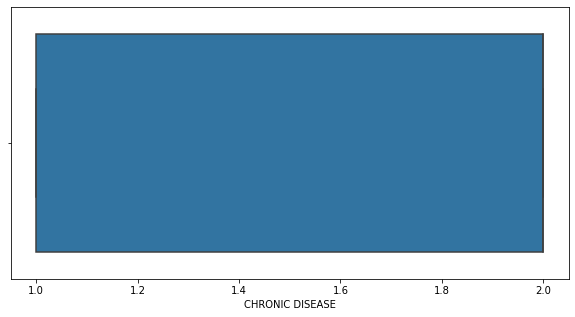

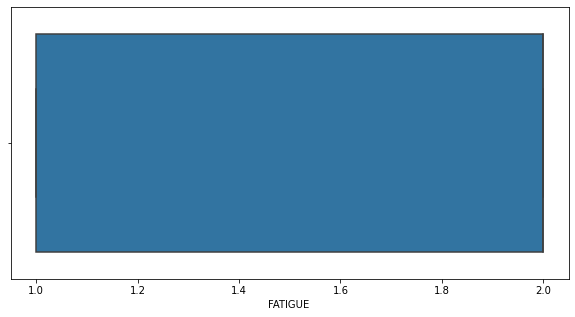

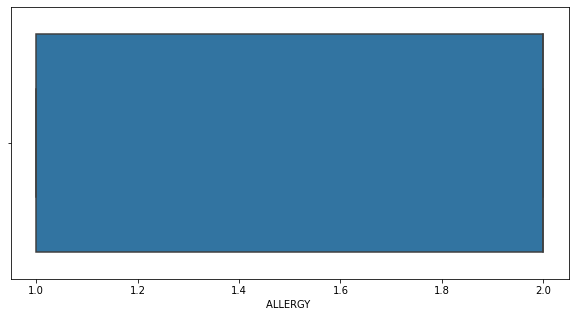

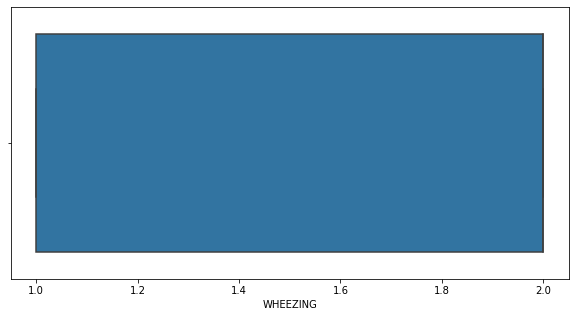

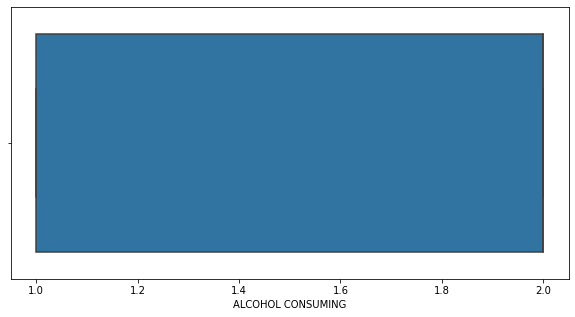

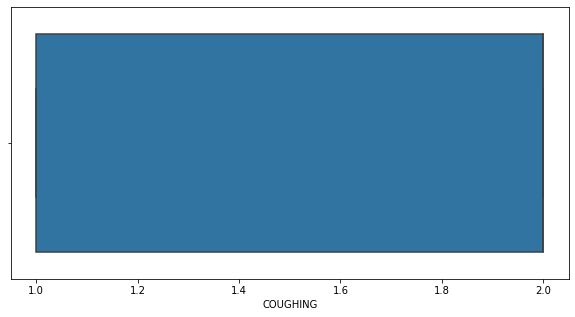

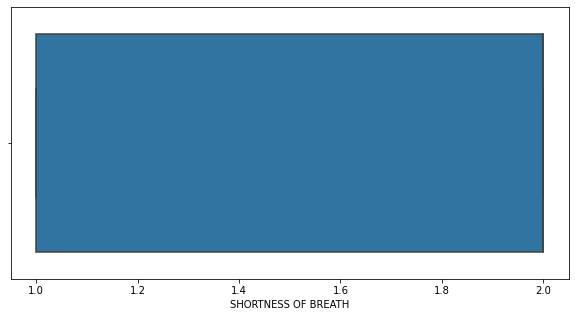

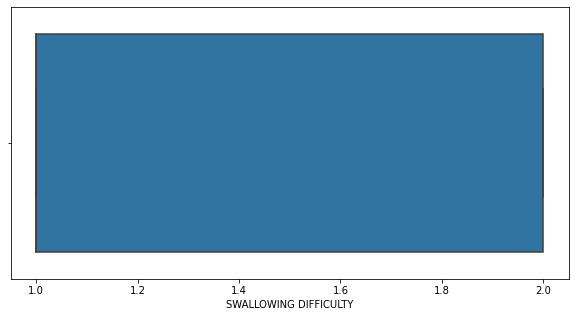

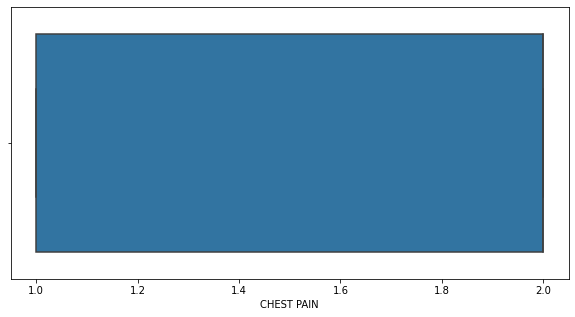

In [140]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df1)

In [141]:
df1.value_counts("LUNG_CANCER")

LUNG_CANCER
1    238
0     38
dtype: int64

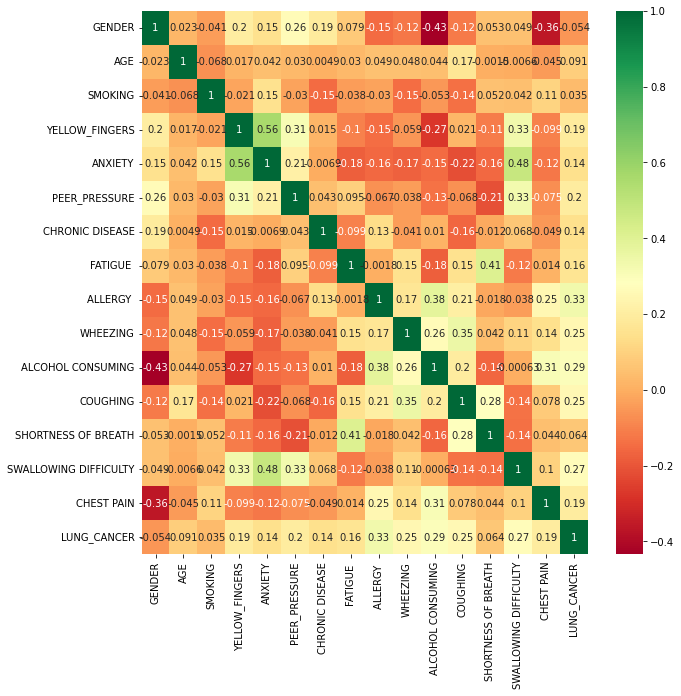

In [142]:
corr = df1.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sns.heatmap(df1[features].corr(), annot=True, cmap='RdYlGn')

## Train Test Split

In [143]:
y = df1["LUNG_CANCER"]
X = df1.drop(["LUNG_CANCER"],axis =1)

In [144]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)

In [145]:
print("X train shape:" ,X_train.shape, "Y train shape:", y_train.shape )

X train shape: (220, 15) Y train shape: (220,)


In [146]:
print("X test shape:" ,X_test.shape, "Y test shape:", y_test.shape )

X test shape: (56, 15) Y test shape: (56,)


## Feature Scaling

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1.0,0.425000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,1.0,0.580556,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,0.313889,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.469444,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,0.313889,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,1.0,0.558333,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
217,1.0,0.180556,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
218,1.0,0.802778,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [148]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1.0,0.358333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.380556,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.491667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.225000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.447222,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.647222,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.336111,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
7,0.0,0.491667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
9,0.0,0.225000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


## Handling Imbalanced Class

In [149]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_resampled))
print(sorted(Counter(y_resampled).items()))

Original dataset shape Counter({1: 238, 0: 38})
Resample dataset shape Counter({1: 194, 0: 194})
[(0, 194), (1, 194)]


## Model Building and Evaluation

Training accuracy:  0.9226804123711341
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC58058C10>
Classification Report               precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.95      0.86      0.90        44

    accuracy                           0.86        56
   macro avg       0.79      0.85      0.81        56
weighted avg       0.88      0.86      0.86        56



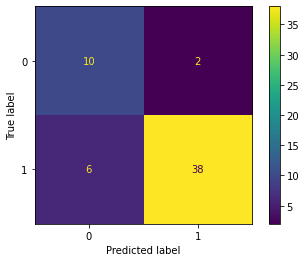

In [150]:
## model 1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_resampled, y_resampled)
print('Training accuracy: ', model.score(X_resampled, y_resampled))

y_pred = model.predict(X_test_scaled)
y_pred


print("Plot confusion matrix",plot_confusion_matrix(model, X_test_scaled, y_test))
print("Classification Report",classification_report(y_test, y_pred))

Training accuracy:  1.0
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC57BEAA10>
Classification Report               precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.88      0.98      0.92        44

    accuracy                           0.88        56
   macro avg       0.87      0.74      0.78        56
weighted avg       0.87      0.88      0.86        56



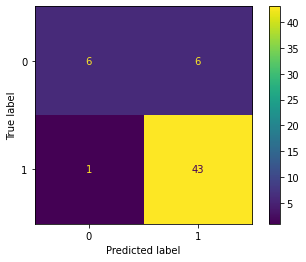

In [151]:
## model 2

from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='gini')
model_2.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_2.score(X_resampled, y_resampled))

y_prediction = model_2.predict(X_test_scaled)
y_prediction

print("Plot confusion matrix",plot_confusion_matrix(model_2, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test ,y_prediction))


Training accuracy:  1.0
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC542142E0>
Classification Report               precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.89      0.95      0.92        44

    accuracy                           0.88        56
   macro avg       0.84      0.77      0.79        56
weighted avg       0.87      0.88      0.87        56



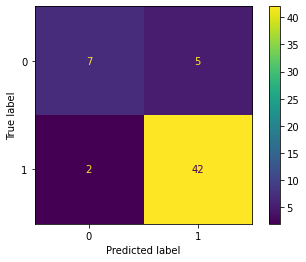

In [152]:
## model 2a (C4.5)

from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy')
model_2.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_2.score(X_resampled, y_resampled))

y_prediction = model_2.predict(X_test_scaled)
y_prediction

print("Plot confusion matrix",plot_confusion_matrix(model_2, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test ,y_prediction))

Training accuracy:  1.0
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC5495E260>
Classification Report               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



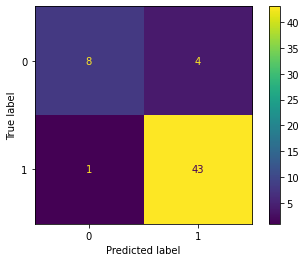

In [153]:
## model 3

from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_3.score(X_resampled, y_resampled))

y_predict = model_3.predict(X_test_scaled)
y_predict

print("Plot confusion matrix",plot_confusion_matrix(model_3, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test, y_predict))

Training accuracy:  0.9639175257731959
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC57BE9750>
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        44

    accuracy                           0.93        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.93      0.93      0.93        56



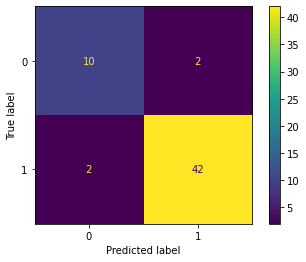

In [154]:
## model 4 (svc)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_resampled, y_resampled)

print('Training accuracy: ',svc.score(X_resampled, y_resampled))

y_predict = svc.predict(X_test_scaled)
y_predict

print("Plot confusion matrix",plot_confusion_matrix(svc, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test, y_predict))

Training accuracy:  0.9432989690721649
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC543CF460>
Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        44

    accuracy                           0.93        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.93      0.93      0.93        56



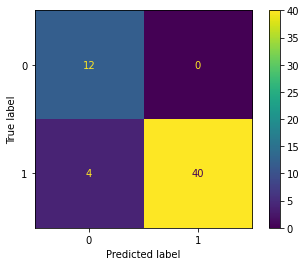

In [155]:
## model 5 (K-NN)

from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier()
k_model.fit(X_resampled, y_resampled)

print('Training accuracy: ',k_model.score(X_resampled, y_resampled))

y_predict = svc.predict(X_test_scaled)
y_predict

print("Plot confusion matrix",plot_confusion_matrix(k_model, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test, y_predict))

Training accuracy:  0.8737113402061856
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC53FD6410>
Classification Report               precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.93      0.91      0.92        44

    accuracy                           0.88        56
   macro avg       0.81      0.83      0.82        56
weighted avg       0.88      0.88      0.88        56



89.08730158730161

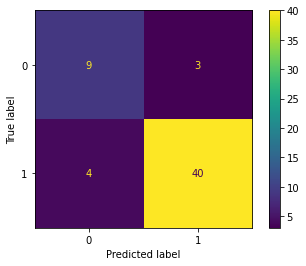

In [156]:
## model 6 (Naive Bayes)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report

model = GaussianNB()
model.fit(X_resampled, y_resampled)
print('Training accuracy: ', model.score(X_resampled, y_resampled))

y_pred = model.predict(X_test_scaled)
y_pred


print("Plot confusion matrix",plot_confusion_matrix(model, X_test_scaled, y_test))
print("Classification Report",classification_report(y_test, y_pred))


from sklearn.model_selection import cross_val_score
cross_val_score(model, X,y , cv=10).mean()*100

Training accuracy:  0.9845360824742269
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC53F30790>
Classification Report               precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.88      0.95      0.91        44

    accuracy                           0.86        56
   macro avg       0.81      0.73      0.76        56
weighted avg       0.85      0.86      0.85        56



91.67989417989418

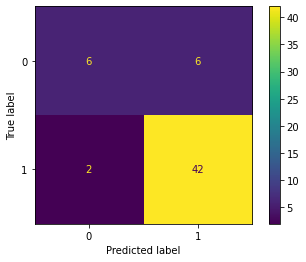

In [157]:
## model 7 (MLP)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=42)
clf.fit(X_resampled, y_resampled)
print('Training accuracy: ', clf.score(X_resampled, y_resampled))

y_pred = clf.predict(X_test_scaled)
y_pred


print("Plot confusion matrix",plot_confusion_matrix(clf, X_test_scaled, y_test))
print("Classification Report",classification_report(y_test, y_pred))


from sklearn.model_selection import cross_val_score
cross_val_score(clf, X,y , cv=10).mean()*100

# Model with cross validation

In [158]:
# 1. Logistic Regression
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import plot_confusion_matrix, classification_report

    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.8571428571428571
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.8571428571428571
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.8214285714285714
Phase accuracy:  1.0
Phase accuracy:  0.7777777777777778
Phase accuracy:  0.8518518518518519
Phase accuracy:  0.9259259259259259
0.8769841269841271


In [159]:
#2. Descicion Tree 
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.tree import DecisionTreeClassifier
    model_2 = DecisionTreeClassifier(criterion='gini')
    model_2.fit(X_resampled, y_resampled)

    y_pred = model_2.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.8928571428571429
Phase accuracy:  0.9285714285714286
Phase accuracy:  0.9285714285714286
Phase accuracy:  0.7142857142857143
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.7142857142857143
Phase accuracy:  0.9259259259259259
Phase accuracy:  0.7037037037037037
Phase accuracy:  0.9629629629629629
Phase accuracy:  0.9259259259259259
0.858994708994709


In [160]:
#3. C4.5
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.tree import DecisionTreeClassifier
    model_2 = DecisionTreeClassifier(criterion='entropy')
    model_2.fit(X_resampled, y_resampled)

    y_pred = model_2.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.8928571428571429
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.9285714285714286
Phase accuracy:  0.7142857142857143
Phase accuracy:  0.9285714285714286
Phase accuracy:  0.7857142857142857
Phase accuracy:  0.9259259259259259
Phase accuracy:  0.7407407407407407
Phase accuracy:  0.9259259259259259
Phase accuracy:  0.8888888888888888
0.8624338624338623


In [161]:
#4. Random Forest
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.ensemble import RandomForestClassifier
    model_3 = RandomForestClassifier()
    model_3.fit(X_resampled, y_resampled)

    y_pred = model_3.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.9285714285714286
Phase accuracy:  1.0
Phase accuracy:  0.9642857142857143
Phase accuracy:  0.7857142857142857
Phase accuracy:  0.9642857142857143
Phase accuracy:  0.8571428571428571
Phase accuracy:  0.9629629629629629
Phase accuracy:  0.7777777777777778
Phase accuracy:  0.8888888888888888
Phase accuracy:  0.8888888888888888
0.9018518518518517


In [162]:
#5. SVM
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.svm import SVC
    svc = SVC()
    svc.fit(X_resampled, y_resampled)

    y_pred = svc.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.8571428571428571
Phase accuracy:  1.0
Phase accuracy:  0.9285714285714286
Phase accuracy:  0.75
Phase accuracy:  0.9642857142857143
Phase accuracy:  0.8928571428571429
Phase accuracy:  1.0
Phase accuracy:  0.8148148148148148
Phase accuracy:  0.8888888888888888
Phase accuracy:  0.8888888888888888
0.8985449735449735


In [163]:
#6. K-NN
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    k_model = KNeighborsClassifier()
    k_model.fit(X_resampled, y_resampled)

    y_pred = k_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.8928571428571429
Phase accuracy:  1.0
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.75
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.7857142857142857
Phase accuracy:  0.9259259259259259
Phase accuracy:  0.7777777777777778
Phase accuracy:  0.8518518518518519
Phase accuracy:  0.8888888888888888
0.8658730158730158


In [164]:
#7. Naive Bayes
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import plot_confusion_matrix, classification_report
    model = GaussianNB()
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.8928571428571429
Phase accuracy:  0.9642857142857143
Phase accuracy:  0.8928571428571429
Phase accuracy:  0.8571428571428571
Phase accuracy:  0.7857142857142857
Phase accuracy:  0.8571428571428571
Phase accuracy:  0.9629629629629629
Phase accuracy:  0.7037037037037037
Phase accuracy:  0.8148148148148148
Phase accuracy:  0.9259259259259259
0.8657407407407407


In [165]:
#8. MLP
 
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    
    from imblearn.over_sampling import SMOTE
    from collections import Counter
    sm = SMOTE(random_state = 42)
    X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import plot_confusion_matrix, classification_report
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=42)
    clf.fit(X_resampled, y_resampled)

    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print('Phase accuracy: ', acc)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)

Phase accuracy:  0.8928571428571429
Phase accuracy:  0.8571428571428571
Phase accuracy:  0.9285714285714286
Phase accuracy:  0.8214285714285714
Phase accuracy:  0.9642857142857143
Phase accuracy:  0.8214285714285714
Phase accuracy:  1.0
Phase accuracy:  0.7777777777777778
Phase accuracy:  0.9259259259259259
Phase accuracy:  0.8518518518518519
0.884126984126984
